# Loading data and libraries

In [91]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import IPython.display as ipd
from itertools import cycle
from tqdm import tqdm 
from scipy.fft import fft, fftfreq
from scipy import signal

# remove warnings from notebook
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [92]:
audio_files = glob('C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/signals/*.npy')
# print(audio_files[0].replace("\\", "/"))

In [93]:
data = np.load('C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/signals/ns011a_1.npy')
data.shape

(44133, 4)

In [94]:
import pandas as pd
pd.read_csv("C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/labels/ns011a_1.csv")

participant file_num  swallow_num  start  end  duration  fnames
0       NS011        a          1.0    152  234      82.0  ns011a
1       NS011        a          2.0    252  329      77.0  ns011a
2       NS011        a          3.0    358  442      84.0  ns011a

In [95]:
sr = 4000
audio_signals = {}
for audio_file in audio_files:
  audio_signals[(audio_file.replace("\\","/").split('/')[-1].split('.')[0])]  = np.load(audio_file)[:, 0]

In [96]:
audio_signals

{'ns011a_1': array([0.00657197, 0.0067635 , 0.01045403, ..., 0.00097021, 0.00210634,
        0.00056948]),
 'ns011a_2': array([ 0.00124896,  0.00120793,  0.00215894, ..., -0.00077158,
        -0.00267121, -0.00356146]),
 'ns011a_3': array([-0.00239715, -0.00271224, -0.00166589, ..., -0.01379771,
        -0.01155921, -0.01380967]),
 'ns011a_4': array([-0.00209516,  0.00184062,  0.00062569, ..., -0.02081857,
        -0.02178215, -0.02108778]),
 'ns011b_1': array([ 0.00709434,  0.01309289,  0.01339645, ..., -0.00602086,
        -0.00527946, -0.00215103]),
 'ns011b_2': array([ 0.0199065 ,  0.01939793,  0.01618836, ..., -0.00912999,
        -0.00911504, -0.00944011]),
 'ns011b_3': array([0.00573509, 0.00423904, 0.00313114, ..., 0.00349697, 0.00509966,
        0.0060647 ]),
 'ns012a_1': array([ 0.01754471,  0.01223392,  0.00714061, ..., -0.00592521,
        -0.0061917 , -0.00387135]),
 'ns012a_2': array([0.01904883, 0.02121959, 0.02246032, ..., 0.01192892, 0.01293202,
        0.00942582]),
 

In [97]:
from tqdm import tqdm
label_files = glob('C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/labels/*.csv')
gulp_data = pd.DataFrame()
for csv in tqdm(label_files):
  gulp_datum = pd.read_csv(csv)
  gulp_datum['audio'] = csv.replace("\\","/").split('/')[-1].split('.')[0]
  gulp_datum['total_start_sec'] = gulp_datum.start.astype(int)
  gulp_datum['total_stop_sec'] = gulp_datum.end.astype(int)
  gulp_data = gulp_data.append(gulp_datum)
gulp_data

100%|██████████| 1282/1282 [00:03<00:00, 394.68it/s]


participant file_num  swallow_num start   end  duration  fnames     audio  \
0        NS011        a          1.0   152   234      82.0  ns011a  ns011a_1   
1        NS011        a          2.0   252   329      77.0  ns011a  ns011a_1   
2        NS011        a          3.0   358   442      84.0  ns011a  ns011a_1   
0        NS011        a          4.0   175   241      66.0  ns011a  ns011a_2   
1        NS011        a          5.0   309   360      51.0  ns011a  ns011a_2   
..         ...      ...          ...   ...   ...       ...     ...       ...   
0         S048        c          1.0   191   237      46.0   s048c   s048c_1   
0         S048        d          1.0   102   160      58.0   s048d   s048d_1   
0         S048        e          1.0   311   355      44.0   s048e   s048e_1   
1         S048        e          2.0   761   805      44.0   s048e   s048e_1   
2         S048        e          3.0  1091  1131      40.0   s048e   s048e_1   

    total_start_sec  total_stop_sec  
0               152             234  
1               252             329  
2               358             442  
0               175             241  
1               309             360  
..              ...             ...  
0               191             237  
0               102             160  
0               311             355  
1               761             805  
2              1091            1131  

[1868 rows x 10 columns]

In [98]:
gulp_data.head()

participant file_num  swallow_num start  end  duration  fnames     audio  \
0       NS011        a          1.0   152  234      82.0  ns011a  ns011a_1   
1       NS011        a          2.0   252  329      77.0  ns011a  ns011a_1   
2       NS011        a          3.0   358  442      84.0  ns011a  ns011a_1   
0       NS011        a          4.0   175  241      66.0  ns011a  ns011a_2   
1       NS011        a          5.0   309  360      51.0  ns011a  ns011a_2   

   total_start_sec  total_stop_sec  
0              152             234  
1              252             329  
2              358             442  
0              175             241  
1              309             360

In [99]:
gulp_data.describe()

swallow_num     duration  total_start_sec  total_stop_sec
count  1868.000000  1868.000000      1868.000000     1868.000000
mean      3.661670    53.221092       311.614561      364.835653
std       2.729177    33.681610       287.067965      283.874404
min       1.000000     2.000000     -1102.000000       17.000000
25%       2.000000    42.000000       119.000000      172.750000
50%       3.000000    50.000000       222.000000      278.000000
75%       5.000000    58.000000       411.000000      463.000000
max      19.000000  1183.000000      1923.000000     1989.000000

# Time Domain Feature selection and Frequency Domain feature selection

In [100]:
from tqdm import tqdm 
from scipy.fft import fft, fftfreq
from scipy import signal

frame_size = 16

overlap_per = 50
overlap = int(frame_size * overlap_per / 100)

print(f"Frame size: {frame_size}")
print(f"Overlap size: {overlap}")

# Statistical Features- time
time_frame_data_mins = []
time_frame_data_maxs = []
time_frame_data_means = []
time_frame_data_medians = []
time_frame_data_stds = []
time_frame_data_ptps = []

# Time domain features
amplitude_evelopes = []
root_mean_square_energies = []
zero_crossing_rates = []

# Statistical Features- freq
freq_magnitude_prod_frame_data_mins = []
freq_magnitude_prod_frame_data_maxs = []
freq_magnitude_prod_frame_data_means = []
freq_magnitude_prod_frame_data_medians = []
freq_magnitude_prod_frame_data_stds = []
freq_magnitude_prod_frame_data_ptps = []

# Frequency domain features
split_frequency = 1500
band_energy_ratios = []
spectral_centroids = []
bandwidths = []

# Gulp Data
gulp_constituencies = []

# Audio Metadata
audio_name = []

cnt = 0
for idx, gulp_row in gulp_data.iterrows():
  cnt += 1
  try:
    start = gulp_row.start
    end = gulp_row.end
    if start < 0: 
      end = audio_signals[gulp_row.audio].shape[0] + start
      start = gulp_row.end
    time_frame_data = audio_signals[gulp_row.audio][start:end]

    # Gulp Data
    gulp_constituencies.append(1)
    # breakpoint()
    # Audio Data
    audio_name.append(gulp_row.audio)

    # Time based Statistical Features
    time_frame_data_mins.append(np.amin(time_frame_data))
    time_frame_data_maxs.append(np.amax(time_frame_data))
    time_frame_data_means.append(np.mean(time_frame_data))
    time_frame_data_medians.append(np.median(time_frame_data))
    time_frame_data_stds.append(np.std(time_frame_data))
    time_frame_data_ptps.append(np.ptp(time_frame_data))
    
    # Time domain features
    amplitude_evelopes.append(np.amax(time_frame_data))
    root_mean_square_energies.append(np.sqrt(np.mean(time_frame_data**2)))
    zero_crossing_rates.append(0.5 * np.sum([np.abs(np.sign(time_frame_data[idx]) - np.sign(time_frame_data[idx + 1])) for idx in range(len(time_frame_data) - 1)]))

    # Fourier transform with hann windowing
    N = (len(time_frame_data))
    yf = np.abs(np.fft.fft(signal.hann(N) * time_frame_data)) [:N//2]
    xf = np.linspace(0, sr, N)[:N//2]

    # Frequency based Statistical Features
    freq_magnitude_prod_frame_data = xf * yf
    freq_magnitude_prod_frame_data_mins.append(np.amin(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_maxs.append(np.amax(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_means.append(np.mean(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_medians.append(np.median(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_stds.append(np.std(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_ptps.append(np.ptp(freq_magnitude_prod_frame_data))

    # Frequency domain features
    band_energy_ratios.append(np.sum(yf[:int(split_frequency* (N / sr))] ** 2) / np.sum(yf[int(split_frequency* (N / sr)):] ** 2))
    spectral_centroids.append(np.sum(yf * xf) / np.sum(yf))
    bandwidths.append(np.sum((xf - (np.sum(yf * xf) / np.sum(yf))) * yf) / np.sum(yf))
  except: 
    print(gulp_row)
    print(start)
    print(end)
    break

to_break = False
threshold = len(gulp_constituencies) * 2
for audio_signal in audio_signals.keys():
  if to_break: break;
  y = audio_signals[audio_signal]
  for start in (range(0, len(y), overlap)):
    if len(gulp_constituencies) > threshold:
       to_break = True;
       break;

    # Getting Frame
    stop = (start + frame_size) if (start + frame_size) < len(y) else (len(y) - 1)
    time_frame_data = y[start:stop]
    if (stop - start) < overlap: break

    # Gulp Data
    gulp_constituencies.append(0)

    # Audio Data
    audio_name.append(audio_signal)

    # Time based Statistical Features
    time_frame_data_mins.append(np.amin(time_frame_data))
    time_frame_data_maxs.append(np.amax(time_frame_data))
    time_frame_data_means.append(np.mean(time_frame_data))
    time_frame_data_medians.append(np.median(time_frame_data))
    time_frame_data_stds.append(np.std(time_frame_data))
    time_frame_data_ptps.append(np.ptp(time_frame_data))
    
    # Time domain features
    amplitude_evelopes.append(np.amax(time_frame_data))
    root_mean_square_energies.append(np.sqrt(np.mean(time_frame_data**2)))
    zero_crossing_rates.append(0.5 * np.sum([np.abs(np.sign(time_frame_data[idx]) - np.sign(time_frame_data[idx + 1])) for idx in range(len(time_frame_data) - 1)]))

    # Fourier transform with hann windowing
    N = (len(time_frame_data))
    yf = np.abs(np.fft.fft(signal.hann(N) * time_frame_data)) [:N//2]
    xf = np.linspace(0, sr, N)[:N//2]

    # Frequency based Statistical Features
    freq_magnitude_prod_frame_data = xf * yf
    freq_magnitude_prod_frame_data_mins.append(np.amin(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_maxs.append(np.amax(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_means.append(np.mean(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_medians.append(np.median(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_stds.append(np.std(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_ptps.append(np.ptp(freq_magnitude_prod_frame_data))

    # Frequency domain features
    band_energy_ratios.append(np.sum(yf[:int(split_frequency* (N / sr))] ** 2) / np.sum(yf[int(split_frequency* (N / sr)):] ** 2))
    spectral_centroids.append(np.sum(yf * xf) / np.sum(yf))
    bandwidths.append(np.sum((xf - (np.sum(yf * xf) / np.sum(yf))) * yf) / np.sum(yf))

# Dataframe initialization
gulp_analysis = pd.DataFrame()

# Statistical Features- time
gulp_analysis['time_frame_data_mins'] = time_frame_data_mins
gulp_analysis['time_frame_data_maxs'] = time_frame_data_maxs
gulp_analysis['time_frame_data_means'] = time_frame_data_means
gulp_analysis['time_frame_data_medians'] = time_frame_data_medians
gulp_analysis['time_frame_data_stds'] = time_frame_data_stds
gulp_analysis['time_frame_data_ptps'] = time_frame_data_ptps

# Time domain features
gulp_analysis['amplitude_evelopes'] = amplitude_evelopes
gulp_analysis['root_mean_square_energies'] = root_mean_square_energies
gulp_analysis['zero_crossing_rates'] = zero_crossing_rates

# Statistical Features- freq
gulp_analysis['freq_magnitude_prod_frame_data_mins'] = freq_magnitude_prod_frame_data_mins
gulp_analysis['freq_magnitude_prod_frame_data_maxs'] = freq_magnitude_prod_frame_data_maxs
gulp_analysis['freq_magnitude_prod_frame_data_means'] = freq_magnitude_prod_frame_data_means
gulp_analysis['freq_magnitude_prod_frame_data_medians'] = freq_magnitude_prod_frame_data_medians
gulp_analysis['freq_magnitude_prod_frame_data_stds'] = freq_magnitude_prod_frame_data_stds
gulp_analysis['freq_magnitude_prod_frame_data_ptps'] = freq_magnitude_prod_frame_data_ptps

# Frequency domain features
gulp_analysis['band_energy_ratios'] = band_energy_ratios
gulp_analysis['spectral_centroids'] = spectral_centroids
gulp_analysis['bandwidths'] = bandwidths

# Gulp Data
gulp_analysis['gulp_constituencies'] = gulp_constituencies

# Audio Metadata
gulp_analysis['audio_name'] = audio_name

# Dataframe
gulp_analysis.describe()

Frame size: 16
Overlap size: 8


time_frame_data_mins  time_frame_data_maxs  time_frame_data_means  \
count           3737.000000           3737.000000            3737.000000   
mean              -0.017382              0.005341              -0.006015   
std                0.109480              0.104137               0.098172   
min               -3.862082             -3.836349              -3.855063   
25%               -0.014161             -0.000489              -0.006977   
50%               -0.003689              0.008235               0.002216   
75%                0.004865              0.018501               0.010663   
max                0.304686              1.482338               0.326854   

       time_frame_data_medians  time_frame_data_stds  time_frame_data_ptps  \
count              3737.000000           3737.000000           3737.000000   
mean                 -0.006074              0.006217              0.022722   
std                   0.098432              0.025905              0.082562   
min                  -3.857488              0.000085              0.000321   
25%                  -0.007126              0.001778              0.006525   
50%                   0.002114              0.002787              0.010395   
75%                   0.010675              0.005012              0.018225   
max                   0.324244              1.292191              3.291660   

       amplitude_evelopes  root_mean_square_energies  zero_crossing_rates  \
count         3737.000000                3737.000000          3737.000000   
mean             0.005341                   0.025620             1.873963   
std              0.104137                   0.098626            23.840081   
min             -3.836349                   0.000398             0.000000   
25%             -0.000489                   0.005470             0.000000   
50%              0.008235                   0.010321             0.000000   
75%              0.018501                   0.019477             1.000000   
max              1.482338                   3.855069          1150.000000   

       freq_magnitude_prod_frame_data_mins  \
count                               3737.0   
mean                                   0.0   
std                                    0.0   
min                                    0.0   
25%                                    0.0   
50%                                    0.0   
75%                                    0.0   
max                                    0.0   

       freq_magnitude_prod_frame_data_maxs  \
count                          3737.000000   
mean                             32.252601   
std                             122.295495   
min                               0.000000   
25%                               7.874448   
50%                              12.782030   
75%                              22.080271   
max                            3995.477627   

       freq_magnitude_prod_frame_data_means  \
count                           3737.000000   
mean                               6.193532   
std                               13.206350   
min                                0.000000   
25%                                3.192171   
50%                                4.322107   
75%                                5.710828   
max                              287.254841   

       freq_magnitude_prod_frame_data_medians  \
count                             3737.000000   
mean                                 4.313982   
std                                  7.400459   
min                                  0.000000   
25%                                  2.555639   
50%                                  3.430055   
75%                                  4.436613   
max                                181.515362   

       freq_magnitude_prod_frame_data_stds  \
count                          3737.000000   
mean                              7.343868   
std                              24.798422   
min                               0.000000   

In [101]:
gulp_analysis

time_frame_data_mins  time_frame_data_maxs  time_frame_data_means  \
0                -0.002836              0.009572               0.004097   
1                -0.004822              0.016228               0.000680   
2                -0.006107              0.011462              -0.000217   
3                -0.008630              0.001343              -0.004453   
4                -0.001870              0.009135               0.002885   
...                    ...                   ...                    ...   
3732             -0.029414             -0.020872              -0.025503   
3733             -0.029414             -0.020812              -0.024429   
3734             -0.028431             -0.020812              -0.024240   
3735             -0.025515             -0.018730              -0.022774   
3736             -0.023888             -0.010951              -0.019467   

      time_frame_data_medians  time_frame_data_stds  time_frame_data_ptps  \
0                    0.005279              0.003498              0.012407   
1                    0.000325              0.003546              0.021049   
2                   -0.001135              0.004170              0.017569   
3                   -0.004969              0.002192              0.009973   
4                    0.002857              0.002683              0.011006   
...                       ...                   ...                   ...   
3732                -0.025459              0.002484              0.008542   
3733                -0.024211              0.002556              0.008603   
3734                -0.024304              0.001857              0.007619   
3735                -0.023374              0.002007              0.006785   
3736                -0.019759              0.003290              0.012937   

      amplitude_evelopes  root_mean_square_energies  zero_crossing_rates  \
0               0.009572                   0.005388                 12.0   
1               0.016228                   0.003611                 20.0   
2               0.011462                   0.004176                  9.0   
3               0.001343                   0.004963                  3.0   
4               0.009135                   0.003940                 10.0   
...                  ...                        ...                  ...   
3732           -0.020872                   0.025624                  0.0   
3733           -0.020812                   0.024563                  0.0   
3734           -0.020812                   0.024311                  0.0   
3735           -0.018730                   0.022862                  0.0   
3736           -0.010951                   0.019743                  0.0   

      freq_magnitude_prod_frame_data_mins  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
3732                                  0.0   
3733                                  0.0   
3734                                  0.0   
3735                                  0.0   
3736                                  0.0   

      freq_magnitude_prod_frame_data_maxs  \
0                               13.564685   
1                               19.808490   
2                               17.049549   
3                               13.245348   
4                               13.781765   
...                                   ...   
3732                            31.016467   
3733                            26.520007   
3734                            27.922604   
3735                            25.973930   
3736                            21.141786   

      freq_magnitude_prod_frame_data_means  \
0                                 5.590493   
1                                 4.862155   
2                                 6.147005   
3

In [102]:
gulp_data

participant file_num  swallow_num start   end  duration  fnames     audio  \
0        NS011        a          1.0   152   234      82.0  ns011a  ns011a_1   
1        NS011        a          2.0   252   329      77.0  ns011a  ns011a_1   
2        NS011        a          3.0   358   442      84.0  ns011a  ns011a_1   
0        NS011        a          4.0   175   241      66.0  ns011a  ns011a_2   
1        NS011        a          5.0   309   360      51.0  ns011a  ns011a_2   
..         ...      ...          ...   ...   ...       ...     ...       ...   
0         S048        c          1.0   191   237      46.0   s048c   s048c_1   
0         S048        d          1.0   102   160      58.0   s048d   s048d_1   
0         S048        e          1.0   311   355      44.0   s048e   s048e_1   
1         S048        e          2.0   761   805      44.0   s048e   s048e_1   
2         S048        e          3.0  1091  1131      40.0   s048e   s048e_1   

    total_start_sec  total_stop_sec  
0               152             234  
1               252             329  
2               358             442  
0               175             241  
1               309             360  
..              ...             ...  
0               191             237  
0               102             160  
0               311             355  
1               761             805  
2              1091            1131  

[1868 rows x 10 columns]

## Statistical Modelling

In [103]:
gulp_analysis.groupby('gulp_constituencies').count().audio_name

gulp_constituencies
0    1869
1    1868
Name: audio_name, dtype: int64

In [104]:
gulp_analysis.dropna().groupby('gulp_constituencies').count().audio_name

gulp_constituencies
0    1869
1    1867
Name: audio_name, dtype: int64

In [105]:
gulp_analysis.dropna(inplace=True)

In [106]:
balanced_gulp_analysis = pd.concat([gulp_analysis.loc[gulp_analysis.gulp_constituencies == 0][:1875], gulp_analysis.loc[gulp_analysis.gulp_constituencies == 1][:1875]])
balanced_gulp_analysis = balanced_gulp_analysis.sample(frac=1, random_state=682)
balanced_gulp_analysis.head()

time_frame_data_mins  time_frame_data_maxs  time_frame_data_means  \
3188             -0.007083             -0.002216              -0.004407   
1968              0.001806              0.010029               0.005890   
1977             -0.003948              0.004787               0.001154   
1837             -0.003229              0.008114               0.003014   
2944              0.001081              0.010551               0.006090   

      time_frame_data_medians  time_frame_data_stds  time_frame_data_ptps  \
3188                -0.004145              0.001475              0.004867   
1968                 0.005696              0.002603              0.008223   
1977                 0.001188              0.002348              0.008735   
1837                 0.003061              0.003800              0.011343   
2944                 0.006078              0.002420              0.009470   

      amplitude_evelopes  root_mean_square_energies  zero_crossing_rates  \
3188           -0.002216                   0.004647                  0.0   
1968            0.010029                   0.006440                  0.0   
1977            0.004787                   0.002616                  3.0   
1837            0.008114                   0.004850                  2.0   
2944            0.010551                   0.006553                  0.0   

      freq_magnitude_prod_frame_data_mins  \
3188                                  0.0   
1968                                  0.0   
1977                                  0.0   
1837                                  0.0   
2944                                  0.0   

      freq_magnitude_prod_frame_data_maxs  \
3188                             4.505046   
1968                             6.472411   
1977                             3.443834   
1837                             5.315141   
2944                             7.856228   

      freq_magnitude_prod_frame_data_means  \
3188                              2.369898   
1968                              2.329509   
1977                              2.004610   
1837                              2.911373   
2944                              4.592726   

      freq_magnitude_prod_frame_data_medians  \
3188                                2.654065   
1968                                2.237416   
1977                                1.987582   
1837                                2.770138   
2944                                4.908196   

      freq_magnitude_prod_frame_data_stds  \
3188                             1.289674   
1968                             1.911248   
1977                             1.025425   
1837                             1.353912   
2944                             2.263788   

      freq_magnitude_prod_frame_data_ptps  band_energy_ratios  \
3188                             4.505046          277.330005   
1968                             6.472411          442.817201   
1977                             3.443834           41.191384   
1837                             5.315141          533.579814   
2944                             7.856228          184.111759   

      spectral_centroids    bandwidths  gulp_constituencies audio_name  
3188          295.620572  1.384890e-14                    0   ns011a_1  
1968          235.538118  1.122553e-14                    0   ns011a_1  
1977          542.560659  9.014673e-14                    0   ns011a_1  
1837          317.421093 -1.089408e-13                    1    s046a_2  
2944          349.551479  8.449886e-14                    0   ns011a_1

In [107]:
from sklearn.ensemble import RandomForestClassifier

x = balanced_gulp_analysis.drop(['gulp_constituencies', 'audio_name'], axis=1).values
y = balanced_gulp_analysis['gulp_constituencies'].values

split = 0.8

x_train = x[:int(len(x) * split)]
x_test = x[int(len(x) * split):]
y_train = y[:int(len(y) * split)]
y_test = y[int(len(y) * split):]

print(f"Length of training set: {len(y_train)}")
print(f"Length of testing set: {len(y_test)}")

clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

Length of training set: 2988
Length of testing set: 748
0.9251336898395722


In [108]:
from joblib import dump
dump(clf, 'RF_on_adult_gulp_data_model')

['RF_on_adult_gulp_data_model']

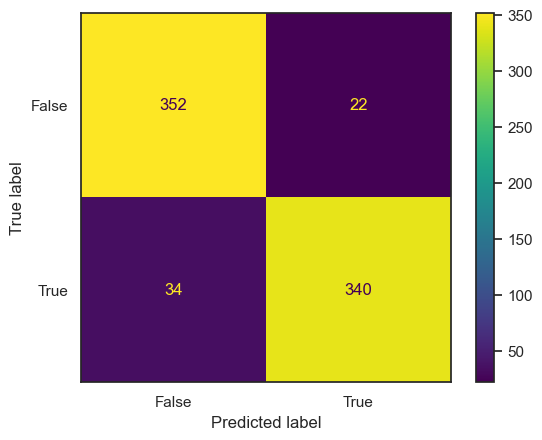

In [16]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Loading data and libraries

In [35]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import IPython.display as ipd
from itertools import cycle
from tqdm import tqdm 
from scipy.fft import fft, fftfreq
from scipy import signal

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [36]:
audio_files = glob('C:/Users/ankur/OneDrive/Desktop/bib_project/samples_from_firmware/gulps1/*.wav')

# audio_files = glob('./*.wav')

In [37]:
audio_signals = {}
for audio_file in audio_files:
  audio_signals[audio_file.split('\\')[-1][17:21]], sr = librosa.load(audio_file, sr=44100)

In [38]:
audio_signals

{'1160': array([ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -5.373599e-05,
        -6.616719e-05, -5.740010e-05], dtype=float32),
 '1206': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.5259437e-06, -2.7249411e-05, -3.1007930e-05], dtype=float32),
 '1208': array([ 0.        ,  0.        ,  0.        , ..., -0.00059262,
        -0.00067127, -0.00056835], dtype=float32),
 '1219': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.7530855e-06, -2.4719944e-05, -3.2348922e-05], dtype=float32),
 '1341': array([0.        , 0.        , 0.        , ..., 0.00021616, 0.00021723,
        0.00018441], dtype=float32),
 '1344': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -9.0107525e-05, -6.9922462e-05, -5.6599918e-05], dtype=float32)}

In [39]:
print(f"Shape of s1: {audio_signals['s1'].shape}, time duration: {int(audio_signals['s1'].size / (sr * 60))} min {int((audio_signals['s1'].size / sr) % 60)} sec {int(((audio_signals['s1'].size / sr) * 1000) % 1000)} ms")
print(f"Shape of s2: {audio_signals['s2'].shape}, time duration: {int(audio_signals['s2'].size / (sr * 60))} min {int((audio_signals['s2'].size / sr) % 60)} sec {int(((audio_signals['s2'].size / sr) * 1000) % 1000)} ms")
print(f"Shape of s3: {audio_signals['s3'].shape}, time duration: {int(audio_signals['s3'].size / (sr * 60))} min {int((audio_signals['s3'].size / sr) % 60)} sec {int(((audio_signals['s3'].size / sr) * 1000) % 1000)} ms")
print(f"Sample Rate: {sr}")

KeyError: 's1'

In [40]:
gulp_data = pd.DataFrame()
for csv in glob('C:/Users/ankur/OneDrive/Desktop/bib_project/samples_from_firmware/gulps1/*.csv'):
    gulp_datum = pd.read_csv(csv)
    gulp_datum['audio'] = csv[-8:-4]
    gulp_datum['total_start_sec'] = gulp_datum['start']
    gulp_datum['total_stop_sec'] = gulp_datum['stop']
    gulp_data = gulp_data.append(gulp_datum)
# gulp_data

import warnings
warnings.filterwarnings('ignore')

In [41]:
print(gulp_data)

    start    stop audio  total_start_sec  total_stop_sec
0   1.791   2.104  1160            1.791           2.104
1   3.907   4.063  1160            3.907           4.063
2   5.586   5.933  1160            5.586           5.933
3   6.840   6.985  1160            6.840           6.985
4   8.328   8.541  1160            8.328           8.541
0   3.761   4.040  1206            3.761           4.040
1   5.622   5.781  1206            5.622           5.781
2   6.607   6.716  1206            6.607           6.716
3   7.602   7.741  1206            7.602           7.741
0   1.552   1.768  1208            1.552           1.768
1   6.802   6.931  1208            6.802           6.931
2   8.289   8.516  1208            8.289           8.516
3  10.682  10.833  1208           10.682          10.833
0   2.338   2.687  1219            2.338           2.687
1   7.214   7.383  1219            7.214           7.383
2   9.980  10.279  1219            9.980          10.279
0   0.909   1.015  1341        

In [42]:
sr=44100
def time_to_num(seconds = 0):
  return int((seconds) * sr)

In [43]:
gulp_data['start_num'] = gulp_data.total_start_sec.apply(time_to_num).values
gulp_data['stop_num'] = gulp_data.total_stop_sec.apply(time_to_num).values

In [44]:
gulp_data

start    stop audio  total_start_sec  total_stop_sec  start_num  stop_num
0   1.791   2.104  1160            1.791           2.104      78983     92786
1   3.907   4.063  1160            3.907           4.063     172298    179178
2   5.586   5.933  1160            5.586           5.933     246342    261645
3   6.840   6.985  1160            6.840           6.985     301644    308038
4   8.328   8.541  1160            8.328           8.541     367264    376658
0   3.761   4.040  1206            3.761           4.040     165860    178164
1   5.622   5.781  1206            5.622           5.781     247930    254942
2   6.607   6.716  1206            6.607           6.716     291368    296175
3   7.602   7.741  1206            7.602           7.741     335248    341378
0   1.552   1.768  1208            1.552           1.768      68443     77968
1   6.802   6.931  1208            6.802           6.931     299968    305657
2   8.289   8.516  1208            8.289           8.516     365544    375555
3  10.682  10.833  1208           10.682          10.833     471076    477735
0   2.338   2.687  1219            2.338           2.687     103105    118496
1   7.214   7.383  1219            7.214           7.383     318137    325590
2   9.980  10.279  1219            9.980          10.279     440118    453303
0   0.909   1.015  1341            0.909           1.015      40086     44761
1   2.566   2.756  1341            2.566           2.756     113160    121539
2   4.581   4.673  1341            4.581           4.673     202022    206079
3   6.660   6.759  1341            6.660           6.759     293706    298071
0   0.779   0.954  1344            0.779           0.954      34353     42071
1   2.612   2.861  1344            2.612           2.861     115189    126170
2   4.983   5.158  1344            4.983           5.158     219750    227467
3   6.857   6.982  1344            6.857           6.982     302393    307906
4   8.615   8.731  1344            8.615           8.731     379921    385037

In [45]:
# start_space = 367000
# stop_space = 392622

# gulp_data.loc[(gulp_data.audio=='s1') & (gulp_data.start_num <= start_space) & (gulp_data.stop_num >= stop_space)]


In [46]:
gulp_data

start    stop audio  total_start_sec  total_stop_sec  start_num  stop_num
0   1.791   2.104  1160            1.791           2.104      78983     92786
1   3.907   4.063  1160            3.907           4.063     172298    179178
2   5.586   5.933  1160            5.586           5.933     246342    261645
3   6.840   6.985  1160            6.840           6.985     301644    308038
4   8.328   8.541  1160            8.328           8.541     367264    376658
0   3.761   4.040  1206            3.761           4.040     165860    178164
1   5.622   5.781  1206            5.622           5.781     247930    254942
2   6.607   6.716  1206            6.607           6.716     291368    296175
3   7.602   7.741  1206            7.602           7.741     335248    341378
0   1.552   1.768  1208            1.552           1.768      68443     77968
1   6.802   6.931  1208            6.802           6.931     299968    305657
2   8.289   8.516  1208            8.289           8.516     365544    375555
3  10.682  10.833  1208           10.682          10.833     471076    477735
0   2.338   2.687  1219            2.338           2.687     103105    118496
1   7.214   7.383  1219            7.214           7.383     318137    325590
2   9.980  10.279  1219            9.980          10.279     440118    453303
0   0.909   1.015  1341            0.909           1.015      40086     44761
1   2.566   2.756  1341            2.566           2.756     113160    121539
2   4.581   4.673  1341            4.581           4.673     202022    206079
3   6.660   6.759  1341            6.660           6.759     293706    298071
0   0.779   0.954  1344            0.779           0.954      34353     42071
1   2.612   2.861  1344            2.612           2.861     115189    126170
2   4.983   5.158  1344            4.983           5.158     219750    227467
3   6.857   6.982  1344            6.857           6.982     302393    307906
4   8.615   8.731  1344            8.615           8.731     379921    385037

In [47]:
len(gulp_data)

25

# Time Domain Feature selection and Frequency Domain feature selection

In [48]:
def num_to_sec(num):
  return num / sr

In [49]:
from tqdm import tqdm 
from scipy.fft import fft, fftfreq
from scipy import signal


frame_time = 16
frame_size = int(sr * frame_time / 1000)

overlap_per = 50
overlap_time = frame_time * overlap_per / 100
overlap = int(frame_size * overlap_per / 100)

print(f"Frame size: {frame_size}")
print(f"Frame time in milliseconds: {frame_time}ms")

print(f"Overlap time in milliseconds: {overlap_time}")
print(f"Overlap size: {overlap}")

# Statistical Features- time
time_frame_data_mins = []
time_frame_data_maxs = []
time_frame_data_means = []
time_frame_data_medians = []
time_frame_data_stds = []
time_frame_data_ptps = []

# Time domain features
amplitude_evelopes = []
root_mean_square_energies = []
zero_crossing_rates = []

# Statistical Features- freq
freq_magnitude_prod_frame_data_mins = []
freq_magnitude_prod_frame_data_maxs = []
freq_magnitude_prod_frame_data_means = []
freq_magnitude_prod_frame_data_medians = []
freq_magnitude_prod_frame_data_stds = []
freq_magnitude_prod_frame_data_ptps = []

# Frequency domain features
split_frequency = 1500
band_energy_ratios = []
spectral_centroids = []
bandwidths = []

# Gulp Data
gulp_constituencies = []

# Audio Metadata
audio_name = []

for audio_signal in audio_signals.keys():
  print(f'Processing audio signal file: {audio_signal}')
  y = audio_signals[audio_signal]
  for start in tqdm(range(0, len(y), overlap)):

    # Getting Frame
    stop = (start + frame_size) if (start + frame_size) < len(y) else (len(y) - 1)
    time_frame_data = y[start:stop]
    if (stop - start) < overlap: break

    # Time based Statistical Features
    time_frame_data_mins.append(np.amin(time_frame_data))
    time_frame_data_maxs.append(np.amax(time_frame_data))
    time_frame_data_means.append(np.mean(time_frame_data))
    time_frame_data_medians.append(np.median(time_frame_data))
    time_frame_data_stds.append(np.std(time_frame_data))
    time_frame_data_ptps.append(np.ptp(time_frame_data))
    
    # Time domain features
    amplitude_evelopes.append(np.amax(time_frame_data))
    root_mean_square_energies.append(np.sqrt(np.mean(time_frame_data**2)))
    zero_crossing_rates.append(0.5 * np.sum([np.abs(np.sign(time_frame_data[idx]) - np.sign(time_frame_data[idx + 1])) for idx in range(len(time_frame_data) - 1)]))

    # Fourier transform with hann windowing
    N = (len(time_frame_data))
    yf = np.abs(np.fft.fft(signal.hann(N) * time_frame_data)) [:N//2]
    xf = np.linspace(0, sr, N)[:N//2]

    # Frequency based Statistical Features
    freq_magnitude_prod_frame_data = xf * yf
    freq_magnitude_prod_frame_data_mins.append(np.amin(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_maxs.append(np.amax(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_means.append(np.mean(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_medians.append(np.median(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_stds.append(np.std(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_ptps.append(np.ptp(freq_magnitude_prod_frame_data))

    # Frequency domain features
    band_energy_ratios.append(np.sum(yf[:int(split_frequency* (N / sr))] ** 2) / np.sum(yf[int(split_frequency* (N / sr)):] ** 2))
    spectral_centroids.append(np.sum(yf * xf) / np.sum(yf))
    bandwidths.append(np.sum((xf - (np.sum(yf * xf) / np.sum(yf))) * yf) / np.sum(yf))

    # Gulp Data
    gulp_constituencies.append(int(len(gulp_data.loc[(gulp_data.audio == audio_signal) & (gulp_data.total_start_sec <= num_to_sec(start)) & (gulp_data.total_stop_sec >= num_to_sec(stop))]) > 0))

    # Audio Metadata
    audio_name.append(audio_signal)

# Dataframe initialization
gulp_analysis = pd.DataFrame()

# Statistical Features- time
gulp_analysis['time_frame_data_mins'] = time_frame_data_mins
gulp_analysis['time_frame_data_maxs'] = time_frame_data_maxs
gulp_analysis['time_frame_data_means'] = time_frame_data_means
gulp_analysis['time_frame_data_medians'] = time_frame_data_medians
gulp_analysis['time_frame_data_stds'] = time_frame_data_stds
gulp_analysis['time_frame_data_ptps'] = time_frame_data_ptps

# Time domain features
gulp_analysis['amplitude_evelopes'] = amplitude_evelopes
gulp_analysis['root_mean_square_energies'] = root_mean_square_energies
gulp_analysis['zero_crossing_rates'] = zero_crossing_rates

# Statistical Features- freq
gulp_analysis['freq_magnitude_prod_frame_data_mins'] = freq_magnitude_prod_frame_data_mins
gulp_analysis['freq_magnitude_prod_frame_data_maxs'] = freq_magnitude_prod_frame_data_maxs
gulp_analysis['freq_magnitude_prod_frame_data_means'] = freq_magnitude_prod_frame_data_means
gulp_analysis['freq_magnitude_prod_frame_data_medians'] = freq_magnitude_prod_frame_data_medians
gulp_analysis['freq_magnitude_prod_frame_data_stds'] = freq_magnitude_prod_frame_data_stds
gulp_analysis['freq_magnitude_prod_frame_data_ptps'] = freq_magnitude_prod_frame_data_ptps

# Frequency domain features
gulp_analysis['band_energy_ratios'] = band_energy_ratios
gulp_analysis['spectral_centroids'] = spectral_centroids
gulp_analysis['bandwidths'] = bandwidths

# Gulp Data
gulp_analysis['gulp_constituencies'] = gulp_constituencies

# Audio Metadata
gulp_analysis['audio_name'] = audio_name

# Dataframe
gulp_analysis.describe()

Frame size: 705
Frame time in milliseconds: 16ms
Overlap time in milliseconds: 8.0
Overlap size: 352
Processing audio signal file: 1160


100%|█████████▉| 1691/1692 [00:11<00:00, 152.87it/s]


Processing audio signal file: 1206


100%|█████████▉| 37365/37366 [04:02<00:00, 153.98it/s]


Processing audio signal file: 1208


100%|█████████▉| 2693/2694 [00:17<00:00, 151.34it/s]


Processing audio signal file: 1219


100%|█████████▉| 2004/2005 [00:12<00:00, 155.91it/s]


Processing audio signal file: 1341


100%|█████████▉| 1064/1065 [00:06<00:00, 155.61it/s]


Processing audio signal file: 1344


100%|█████████▉| 1252/1253 [00:08<00:00, 153.21it/s]


time_frame_data_mins  time_frame_data_maxs  time_frame_data_means  \
count          46069.000000          46069.000000           46069.000000   
mean              -0.001473              0.001105              -0.000063   
std                0.007203              0.003608               0.000991   
min               -0.421025             -0.028737              -0.029987   
25%               -0.001384              0.000232              -0.000064   
50%               -0.000499              0.000483              -0.000014   
75%               -0.000259              0.001224               0.000035   
max                0.002065              0.380076               0.005885   

       time_frame_data_medians  time_frame_data_stds  time_frame_data_ptps  \
count             46069.000000          46069.000000          46069.000000   
mean                 -0.000037              0.000529              0.002578   
std                   0.001008              0.000894              0.009348   
min                  -0.030120              0.000031              0.000195   
25%                  -0.000061              0.000107              0.000511   
50%                  -0.000006              0.000214              0.001007   
75%                   0.000053              0.000531              0.002629   
max                   0.005982              0.036731              0.471978   

       amplitude_evelopes  root_mean_square_energies  zero_crossing_rates  \
count        46069.000000               46069.000000         46069.000000   
mean             0.001105                   0.000593            50.257809   
std              0.003608                   0.001309            40.159134   
min             -0.028737                   0.000039             0.000000   
25%              0.000232                   0.000121            17.000000   
50%              0.000483                   0.000235            40.000000   
75%              0.001224                   0.000571            74.000000   
max              0.380076                   0.036741           270.000000   

       freq_magnitude_prod_frame_data_mins  \
count                              46069.0   
mean                                   0.0   
std                                    0.0   
min                                    0.0   
25%                                    0.0   
50%                                    0.0   
75%                                    0.0   
max                                    0.0   

       freq_magnitude_prod_frame_data_maxs  \
count                         46069.000000   
mean                             47.524078   
std                             184.101906   
min                               4.872899   
25%                               8.458536   
50%                              13.155734   
75%                              37.509961   
max                           16168.407412   

       freq_magnitude_prod_frame_data_means  \
count                          46069.000000   
mean                               6.621642   
std                               54.428022   
min                                1.662121   
25%                                2.358785   
50%                                2.924366   
75%                                4.503319   
max                             4276.716668   

       freq_magnitude_prod_frame_data_medians  \
count                            46069.000000   
mean                                 5.102238   
std                                 52.101938   
min                                  1.393564   
25%                                  2.103784   
50%                                  2.536102   
75%                                  3.464706   
max                               4274.250435   

       freq_magnitude_prod_frame_data_stds  \
count                         46069.000000   
mean                              6.645941   
std                              39.100452   
min                               1.117839   

In [50]:
gulp_analysis

time_frame_data_mins  time_frame_data_maxs  time_frame_data_means  \
0                 -0.014216              0.001972              -0.004271   
1                 -0.023176             -0.002577              -0.013668   
2                 -0.028044             -0.014216              -0.022480   
3                 -0.029956             -0.023176              -0.027565   
4                 -0.030307             -0.028043              -0.029641   
...                     ...                   ...                    ...   
46064             -0.000347              0.000370              -0.000041   
46065             -0.000347              0.000468               0.000028   
46066             -0.000464              0.000798               0.000104   
46067             -0.000464              0.000798               0.000096   
46068             -0.000428              0.000494               0.000012   

       time_frame_data_medians  time_frame_data_stds  time_frame_data_ptps  \
0                    -0.002577              0.004829              0.016188   
1                    -0.014216              0.006085              0.020599   
2                    -0.023176              0.004114              0.013828   
3                    -0.028044              0.001877              0.006780   
4                    -0.029937              0.000667              0.002264   
...                        ...                   ...                   ...   
46064                -0.000056              0.000142              0.000717   
46065                 0.000012              0.000164              0.000815   
46066                 0.000090              0.000285              0.001262   
46067                 0.000090              0.000313              0.001262   
46068                -0.000028              0.000218              0.000922   

       amplitude_evelopes  root_mean_square_energies  zero_crossing_rates  \
0                0.001972                   0.006447                 54.5   
1               -0.002577                   0.014961                  0.0   
2               -0.014216                   0.022854                  0.0   
3               -0.023176                   0.027629                  0.0   
4               -0.028043                   0.029649                  0.0   
...                   ...                        ...                  ...   
46064            0.000370                   0.000147                 53.0   
46065            0.000468                   0.000167                 49.0   
46066            0.000798                   0.000304                 30.0   
46067            0.000798                   0.000327                 15.0   
46068            0.000494                   0.000218                 33.0   

       freq_magnitude_prod_frame_data_mins  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
46064                                  0.0   
46065                                  0.0   
46066                                  0.0   
46067                                  0.0   
46068                                  0.0   

       freq_magnitude_prod_frame_data_maxs  \
0                                55.072195   
1                               166.826312   
2                               259.264790   
3                               310.621692   
4                               331.003592   
...                                    ...   
46064                            10.548857   
46065                             9.802475   
46066                            11.105770   
46067                            16.438285   
46068                             7.101350   

       freq_magnitude_prod_frame_data_means  \
0                                  7.846823   
1                               

In [51]:
# np.sum(yf[:int(split_frequency* (N / sr))] ** 2) / np.sum(yf[int(split_frequency* (N / sr)):] ** 2)

In [52]:
# frame_time = 16
# sr = 41000
# frame_size = int(sr * frame_time / 1000)

In [53]:
# import numpy as np

In [54]:
# 1500 * (frame_size / sr)

In [55]:
# 0, 1, 10

In [56]:
# np.linspace(0, sr, frame_size)[24]

## Statistical Modelling

In [57]:
gulp_analysis.groupby('gulp_constituencies').count().audio_name

gulp_constituencies
0    45526
1      543
Name: audio_name, dtype: int64

In [58]:
gulp_analysis.dropna().groupby('gulp_constituencies').count().audio_name

gulp_constituencies
0    45526
1      543
Name: audio_name, dtype: int64

In [59]:
np.sum(gulp_analysis.gulp_constituencies == 1)

543

In [60]:
balanced_gulp_analysis = pd.concat([gulp_analysis.loc[gulp_analysis.gulp_constituencies == 0][:2896], gulp_analysis.loc[gulp_analysis.gulp_constituencies == 1][:2896]])
balanced_gulp_analysis = balanced_gulp_analysis.sample(frac=1, random_state=682)
balanced_gulp_analysis.head()

time_frame_data_mins  time_frame_data_maxs  time_frame_data_means  \
1867             -0.000314              0.000264              -0.000036   
2862             -0.000502              0.000243              -0.000120   
487              -0.000253              0.000193              -0.000021   
1077             -0.000249              0.000134              -0.000020   
1858             -0.000285              0.000320               0.000011   

      time_frame_data_medians  time_frame_data_stds  time_frame_data_ptps  \
1867                -0.000036              0.000112              0.000577   
2862                -0.000117              0.000143              0.000745   
487                 -0.000027              0.000094              0.000446   
1077                -0.000007              0.000080              0.000382   
1858                 0.000011              0.000125              0.000605   

      amplitude_evelopes  root_mean_square_energies  zero_crossing_rates  \
1867            0.000264                   0.000117                 97.0   
2862            0.000243                   0.000186                 42.0   
487             0.000193                   0.000096                 97.0   
1077            0.000134                   0.000082                 98.0   
1858            0.000320                   0.000125                 65.0   

      freq_magnitude_prod_frame_data_mins  \
1867                                  0.0   
2862                                  0.0   
487                                   0.0   
1077                                  0.0   
1858                                  0.0   

      freq_magnitude_prod_frame_data_maxs  \
1867                            15.975975   
2862                            14.199377   
487                              8.535219   
1077                             7.423878   
1858                            11.340346   

      freq_magnitude_prod_frame_data_means  \
1867                              4.846828   
2862                              3.535312   
487                               2.588747   
1077                              2.280161   
1858                              3.549916   

      freq_magnitude_prod_frame_data_medians  \
1867                                4.587441   
2862                                3.116106   
487                                 2.305825   
1077                                2.015278   
1858                                3.331373   

      freq_magnitude_prod_frame_data_stds  \
1867                             3.011610   
2862                             2.425879   
487                              1.731370   
1077                             1.617465   
1858                             2.209030   

      freq_magnitude_prod_frame_data_ptps  band_energy_ratios  \
1867                            15.975975            3.657696   
2862                            14.199377            5.199490   
487                              8.535219            9.104254   
1077                             7.423878           13.940313   
1858                            11.340346            5.269475   

      spectral_centroids    bandwidths  gulp_constituencies audio_name  
1867         5095.998075  0.000000e+00                    0       1206  
2862         3798.872237 -5.205779e-13                    0       1206  
487          4829.737698 -6.025616e-13                    0       1160  
1077         5359.797279 -3.795949e-13                    0       1160  
1858         4195.781704  7.634706e-13                    0       1206

In [61]:
x = balanced_gulp_analysis.drop(['gulp_constituencies', 'audio_name'], axis=1).values
y = balanced_gulp_analysis['gulp_constituencies'].values

In [62]:
print(x.shape)
print(y.shape)

(3439, 18)
(3439,)


In [63]:
from sklearn.ensemble import RandomForestClassifier

x = balanced_gulp_analysis.drop(['gulp_constituencies', 'audio_name'], axis=1).values
y = balanced_gulp_analysis['gulp_constituencies'].values

split = 0.9

x_train = x[:int(len(x) * split)]
x_test = x[int(len(x) * split):]
y_train = y[:int(len(y) * split)]
y_test = y[int(len(y) * split):]

print(f"Length of training set: {len(y_train)}")
print(f"Length of testing set: {len(y_test)}")

clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

Length of training set: 3095
Length of testing set: 344
0.8808139534883721


In [90]:
from joblib import dump
dump(clf, 'RF_on_firmware_data_model')

['RF_on_firmware_data_model']

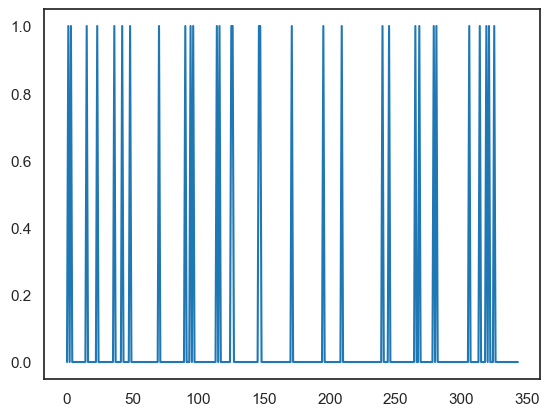

In [64]:
a = clf.predict(x_test)
plt.plot(a)

In [65]:
audio_file_test = glob('C:/Users/ankur/OneDrive/Desktop/bib_project/samples_from_firmware/new_sample/*.wav')

audio_signal_test = {}
for audio_file in audio_file_test:
  audio_signal_test[audio_file.split('\\')[-1][17:21]], sr = librosa.load(audio_file, sr=44100)

print(audio_signal_test)

{'1208': array([ 0.        ,  0.        ,  0.        , ..., -0.00059262,
       -0.00067127, -0.00056835], dtype=float32)}


In [66]:
from tqdm import tqdm 
from scipy.fft import fft, fftfreq
from scipy import signal


frame_time = 16
frame_size = int(sr * frame_time / 1000)

overlap_per = 50
overlap_time = frame_time * overlap_per / 100
overlap = int(frame_size * overlap_per / 100)

print(f"Frame size: {frame_size}")
print(f"Frame time in milliseconds: {frame_time}ms")

print(f"Overlap time in milliseconds: {overlap_time}")
print(f"Overlap size: {overlap}")

# Statistical Features- time
time_frame_data_mins = []
time_frame_data_maxs = []
time_frame_data_means = []
time_frame_data_medians = []
time_frame_data_stds = []
time_frame_data_ptps = []

# Time domain features
amplitude_evelopes = []
root_mean_square_energies = []
zero_crossing_rates = []

# Statistical Features- freq
freq_magnitude_prod_frame_data_mins = []
freq_magnitude_prod_frame_data_maxs = []
freq_magnitude_prod_frame_data_means = []
freq_magnitude_prod_frame_data_medians = []
freq_magnitude_prod_frame_data_stds = []
freq_magnitude_prod_frame_data_ptps = []

# Frequency domain features
split_frequency = 1500
band_energy_ratios = []
spectral_centroids = []
bandwidths = []

# Gulp Data
gulp_constituencies = []

# Audio Metadata
audio_name = []

for audio_signal in audio_signal_test.keys():
  print(f'Processing audio signal file: {audio_signal}')
  y = audio_signal_test[audio_signal]
  for start in tqdm(range(0, len(y), overlap)):

    # Getting Frame
    stop = (start + frame_size) if (start + frame_size) < len(y) else (len(y) - 1)
    time_frame_data = y[start:stop]
    if (stop - start) < overlap: break

    # Time based Statistical Features
    time_frame_data_mins.append(np.amin(time_frame_data))
    time_frame_data_maxs.append(np.amax(time_frame_data))
    time_frame_data_means.append(np.mean(time_frame_data))
    time_frame_data_medians.append(np.median(time_frame_data))
    time_frame_data_stds.append(np.std(time_frame_data))
    time_frame_data_ptps.append(np.ptp(time_frame_data))
    
    # Time domain features
    amplitude_evelopes.append(np.amax(time_frame_data))
    root_mean_square_energies.append(np.sqrt(np.mean(time_frame_data**2)))
    zero_crossing_rates.append(0.5 * np.sum([np.abs(np.sign(time_frame_data[idx]) - np.sign(time_frame_data[idx + 1])) for idx in range(len(time_frame_data) - 1)]))

    # Fourier transform with hann windowing
    N = (len(time_frame_data))
    yf = np.abs(np.fft.fft(signal.hann(N) * time_frame_data)) [:N//2]
    xf = np.linspace(0, sr, N)[:N//2]

    # Frequency based Statistical Features
    freq_magnitude_prod_frame_data = xf * yf
    freq_magnitude_prod_frame_data_mins.append(np.amin(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_maxs.append(np.amax(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_means.append(np.mean(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_medians.append(np.median(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_stds.append(np.std(freq_magnitude_prod_frame_data))
    freq_magnitude_prod_frame_data_ptps.append(np.ptp(freq_magnitude_prod_frame_data))

    # Frequency domain features
    band_energy_ratios.append(np.sum(yf[:int(split_frequency* (N / sr))] ** 2) / np.sum(yf[int(split_frequency* (N / sr)):] ** 2))
    spectral_centroids.append(np.sum(yf * xf) / np.sum(yf))
    bandwidths.append(np.sum((xf - (np.sum(yf * xf) / np.sum(yf))) * yf) / np.sum(yf))

    # Gulp Data
    gulp_constituencies.append(int(len(gulp_data.loc[(gulp_data.audio == audio_signal) & (gulp_data.total_start_sec <= num_to_sec(start)) & (gulp_data.total_stop_sec >= num_to_sec(stop))]) > 0))

    # Audio Metadata
    audio_name.append(audio_signal)

# Dataframe initialization
gulp_analysis = pd.DataFrame()

# Statistical Features- time
gulp_analysis['time_frame_data_mins'] = time_frame_data_mins
gulp_analysis['time_frame_data_maxs'] = time_frame_data_maxs
gulp_analysis['time_frame_data_means'] = time_frame_data_means
gulp_analysis['time_frame_data_medians'] = time_frame_data_medians
gulp_analysis['time_frame_data_stds'] = time_frame_data_stds
gulp_analysis['time_frame_data_ptps'] = time_frame_data_ptps

# Time domain features
gulp_analysis['amplitude_evelopes'] = amplitude_evelopes
gulp_analysis['root_mean_square_energies'] = root_mean_square_energies
gulp_analysis['zero_crossing_rates'] = zero_crossing_rates

# Statistical Features- freq
gulp_analysis['freq_magnitude_prod_frame_data_mins'] = freq_magnitude_prod_frame_data_mins
gulp_analysis['freq_magnitude_prod_frame_data_maxs'] = freq_magnitude_prod_frame_data_maxs
gulp_analysis['freq_magnitude_prod_frame_data_means'] = freq_magnitude_prod_frame_data_means
gulp_analysis['freq_magnitude_prod_frame_data_medians'] = freq_magnitude_prod_frame_data_medians
gulp_analysis['freq_magnitude_prod_frame_data_stds'] = freq_magnitude_prod_frame_data_stds
gulp_analysis['freq_magnitude_prod_frame_data_ptps'] = freq_magnitude_prod_frame_data_ptps

# Frequency domain features
gulp_analysis['band_energy_ratios'] = band_energy_ratios
gulp_analysis['spectral_centroids'] = spectral_centroids
gulp_analysis['bandwidths'] = bandwidths

# Gulp Data
gulp_analysis['gulp_constituencies'] = gulp_constituencies

# Audio Metadata
gulp_analysis['audio_name'] = audio_name

# Dataframe
gulp_analysis.describe()

Frame size: 705
Frame time in milliseconds: 16ms
Overlap time in milliseconds: 8.0
Overlap size: 352
Processing audio signal file: 1208


100%|█████████▉| 2693/2694 [00:17<00:00, 154.91it/s]


time_frame_data_mins  time_frame_data_maxs  time_frame_data_means  \
count           2693.000000           2693.000000            2693.000000   
mean              -0.002729              0.001332              -0.000153   
std                0.022348              0.004053               0.001669   
min               -0.421025             -0.028647              -0.029694   
25%               -0.001112              0.000368              -0.000067   
50%               -0.000556              0.000514              -0.000019   
75%               -0.000403              0.000977               0.000029   
max                0.002065              0.082710               0.004431   

       time_frame_data_medians  time_frame_data_stds  time_frame_data_ptps  \
count              2693.000000           2693.000000           2693.000000   
mean                 -0.000147              0.000636              0.004060   
std                   0.001683              0.001282              0.025437   
min                  -0.029779              0.000081              0.000377   
25%                  -0.000070              0.000166              0.000800   
50%                  -0.000020              0.000228              0.001085   
75%                   0.000034              0.000399              0.002046   
max                   0.004745              0.016515              0.468668   

       amplitude_evelopes  root_mean_square_energies  zero_crossing_rates  \
count         2693.000000                2693.000000          2693.000000   
mean             0.001332                   0.000791            38.074824   
std              0.004053                   0.002057            26.247721   
min             -0.028647                   0.000084             0.000000   
25%              0.000368                   0.000176            18.000000   
50%              0.000514                   0.000246            34.000000   
75%              0.000977                   0.000457            52.000000   
max              0.082710                   0.029697           175.000000   

       freq_magnitude_prod_frame_data_mins  \
count                               2693.0   
mean                                   0.0   
std                                    0.0   
min                                    0.0   
25%                                    0.0   
50%                                    0.0   
75%                                    0.0   
max                                    0.0   

       freq_magnitude_prod_frame_data_maxs  \
count                          2693.000000   
mean                             53.866061   
std                             337.925245   
min                               5.486625   
25%                              10.481774   
50%                              16.268409   
75%                              32.914004   
max                            8704.895271   

       freq_magnitude_prod_frame_data_means  \
count                           2693.000000   
mean                              11.583057   
std                              163.422804   
min                                2.057353   
25%                                2.806077   
50%                                3.284611   
75%                                4.608679   
max                             4276.716668   

       freq_magnitude_prod_frame_data_medians  \
count                             2693.000000   
mean                                10.480513   
std                                163.283813   
min                                  1.907189   
25%                                  2.519223   
50%                                  2.861087   
75%                                  3.738876   
max                               4274.250435   

       freq_magnitude_prod_frame_data_stds  \
count                          2693.000000   
mean                              9.195197   
std                             102.437661   
min                               1.235085   

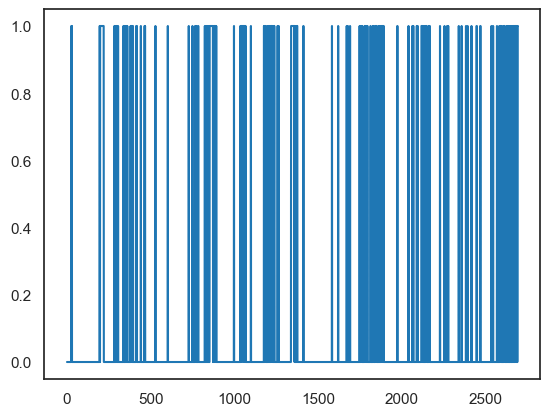

In [67]:
x = gulp_analysis.drop(['gulp_constituencies', 'audio_name'], axis=1).values

a = clf.predict(x)
plt.plot(a)

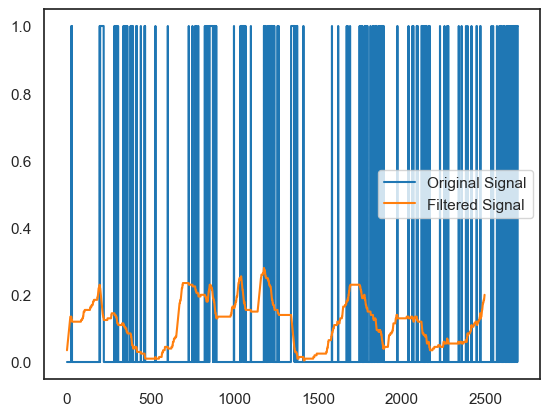

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define the window size for the moving average filter
window_size = 200

# Create a filter kernel with the desired weights
kernel = np.ones(window_size) / window_size

# Use the convolve function to apply the filter to the signal
filtered_signal = np.convolve(a, kernel, mode='valid')

# Plot the original and filtered signals
plt.plot(a, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.legend()
plt.show()

In [88]:
num_crossings = 0

# Loop through the signal and count the number of upward threshold crossings
for i in range(1, len(signal)):
    if signal[i-1] < threshold and signal[i] >= threshold:
        num_crossings += 1

print("Number of gulps:", num_crossings)

Number of gulps: 5


Regression Model

In [87]:
import torch
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        return out

# create a neural network instance
model = NeuralNet(input_size=5, hidden_size=64, output_size=1)

model.load_state_dict(torch.load("C:/Users/ankur/OneDrive/Desktop/bib_project/dataset/model_weights.pth"))
model.eval()

ip = torch.Tensor([10.96, 257.0, 1.0, 4.57, 8.0])
op = model(ip)

print(f"The total amount of milk consumed: {op.item()}")
# Put the model in evaluation mode
# model1.eval()

The total amount of milk consumed: 142.49612426757812


In [85]:
op

tensor([142.4961], grad_fn=<AddBackward0>)

In [73]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(filtered_signal)
num_bumps = len(peaks)
num_bumps

206

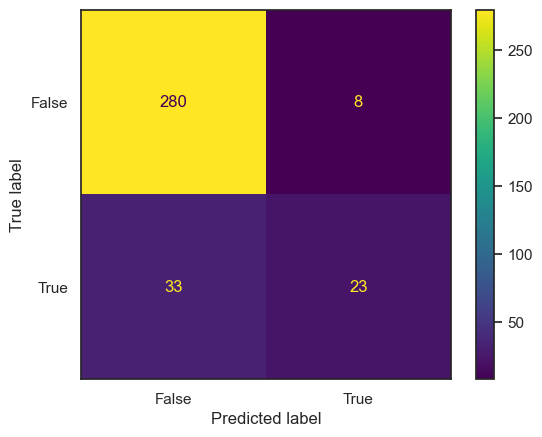

In [112]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [96]:
x_test = balanced_gulp_analysis.drop(['gulp_constituencies', 'audio_name'], axis=1).values
y_test = balanced_gulp_analysis['gulp_constituencies'].values

print(clf.score(x_test, y_test))

0.988950276243094


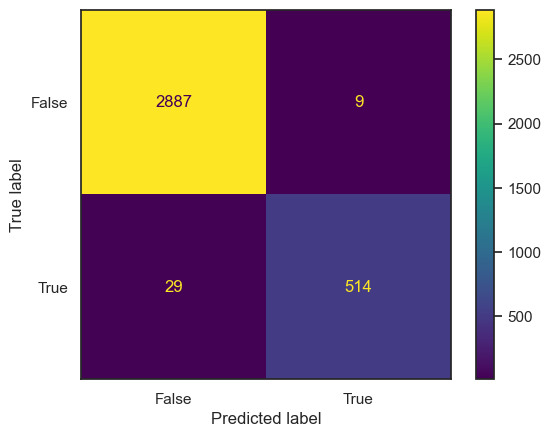

In [109]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()